# Churn Analysis
Binary classification Problem. = churn (yes/no)

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. - -- - Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

# Import libraries

In [170]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

## Model evaluation function

In [185]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

## Load data

In [171]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

## convert TotalCharges from object to float

In [172]:
## convert TotalCharges from object to float
#total_charges = pd.Series(churnData['TotalCharges'])
total_charges = churnData['TotalCharges']
total_charges = pd.to_numeric(total_charges, errors='coerce')

In [173]:
## check for null values
total_charges.isnull().sum()

11

In [174]:
total_charges.fillna(total_charges.mean(), inplace=True)

In [175]:
def drop_columns(file) :
    file.drop(columns=['TotalCharges'], inplace=True)
    return file

In [176]:
drop_columns(churnData)
churnData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,No


In [177]:
churnData = pd.concat((churnData, total_charges), axis=1)

In [178]:
churnData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn,TotalCharges
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,No,29.85
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,No,1889.50


## Modelling

In [179]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [180]:
# converting churn into binary
# churnData['Churn'] = list(map(lambda x:0 if x=='No' else 1, churnData['Churn']))

In [181]:
## Label encoder for churn
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
churnData['Churn']= label_encoder.fit_transform(churnData['Churn'] ) 
churnData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn,TotalCharges
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,0,29.85
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,0,1889.50


In [182]:
## X,y split
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

In [183]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=74)

## Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.79,0.79
1,Precision,0.65,0.67
2,Recall,0.43,0.44


Confusion matrix for the train set
[[3340  302]
 [ 730  558]]


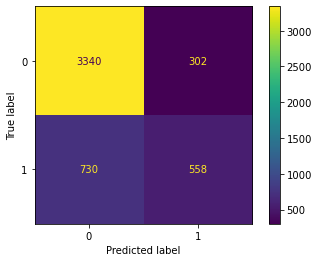



Confusion matrix for the test set
[[1408  124]
 [ 328  253]]


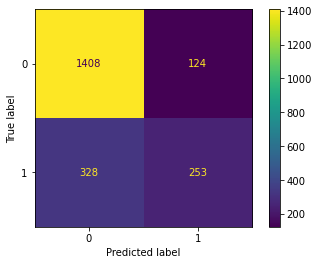

In [184]:
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=74)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## K-NN

In [186]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=8)

In [187]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [188]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,0.11,0.12
1,Mean absolute error,0.41,0.48
2,Mean squared error,0.39,0.49
3,Root mean squared error,0.62,0.70
4,Mean absolute percentual error,24.72,28.65
5,R2,0.32,0.17


In [189]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,0.06,0.07
1,2,Mean absolute error,0.25,0.46
2,2,Mean squared error,0.23,0.59
3,2,Root mean squared error,0.48,0.77
4,2,Mean absolute percentual error,15.25,29.57
...,...,...,...,...
1,20,Mean absolute error,0.45,0.48
2,20,Mean squared error,0.43,0.47
3,20,Root mean squared error,0.65,0.69
4,20,Mean absolute percentual error,26.84,28.62


In [190]:
# checking for overfitting
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.60,-0.01
5,3,R2,0.47,0.10
5,4,R2,0.40,0.13
5,5,R2,0.37,0.15
5,6,R2,0.35,0.17
5,7,R2,0.33,0.17
5,8,R2,0.32,0.17
5,9,R2,0.31,0.18
5,10,R2,0.30,0.19
5,11,R2,0.29,0.19


In [191]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,0.06
1,2,Mean absolute error,Train,0.25
2,2,Mean squared error,Train,0.23
3,2,Root mean squared error,Train,0.48
4,2,Mean absolute percentual error,Train,15.25
...,...,...,...,...
223,20,Mean absolute error,Test,0.48
224,20,Mean squared error,Test,0.47
225,20,Root mean squared error,Test,0.69
226,20,Mean absolute percentual error,Test,28.62


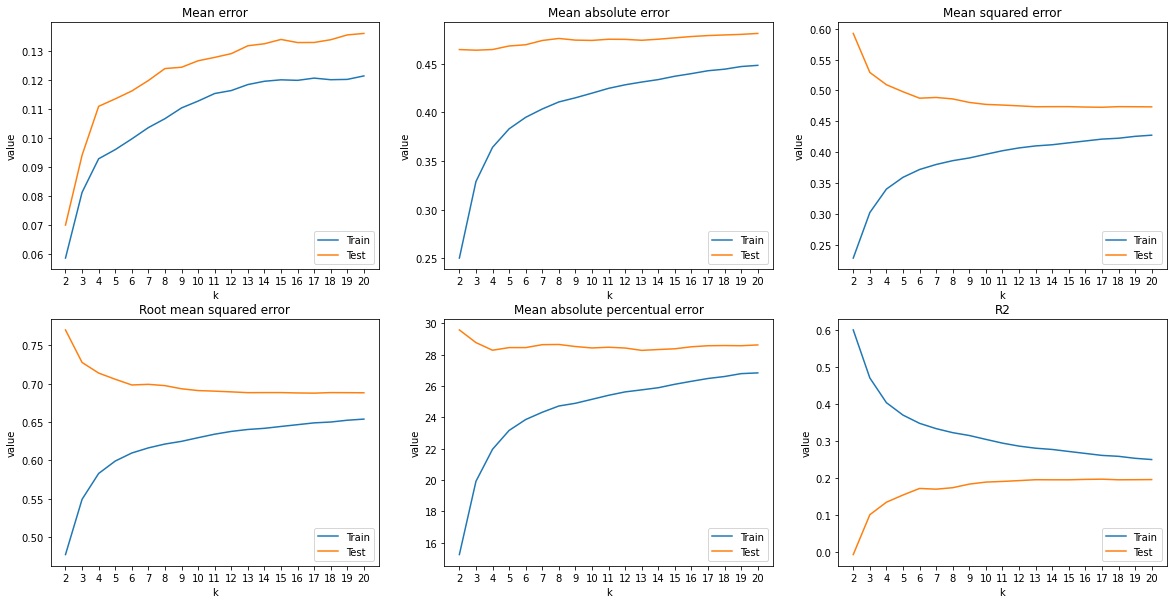

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')


## Decision Tree

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


Confusion matrix for the train set
[[3344  736]
 [ 289  561]]


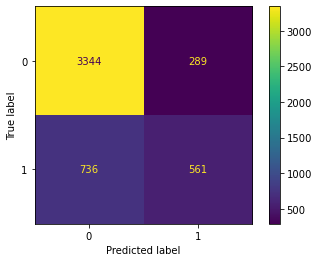



Confusion matrix for the test set
[[1420  340]
 [ 121  232]]


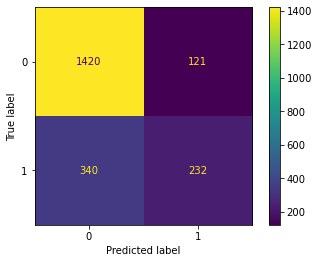

In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# classification (to pred. categorical feature)
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

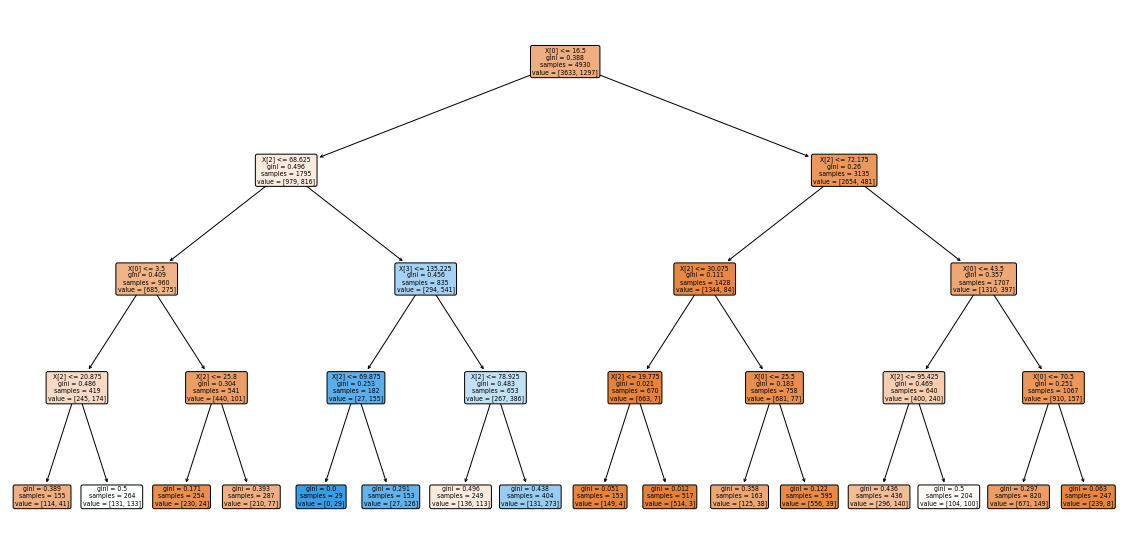

In [194]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
plot_tree(dt,filled = True, rounded=True)
plt.show()